In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.tri as mtri
import random

In [8]:
def draw_polygon(points, color='blue', background_color='white'):
    """
    Draw a filled polygon given a list of points and customize the background color.
    
    Arguments:
    - points: a list of tuples representing the (x, y) coordinates of the points
    - color: the color to fill the polygon with (default: 'blue')
    - background_color: the background color of the plot (default: 'white')
    
    Example usage:
    draw_polygon([(0, 0), (1, 1), (2, 0)], color='red', background_color='lightgray')
    """
    # Extract x and y coordinates from the list of points
    x_coordinates = [point[0] for point in points]
    y_coordinates = [point[1] for point in points]
  
    # Perform Delaunay triangulation on the points
    triang = mtri.Triangulation(x_coordinates, y_coordinates)

    # Add the first point at the end to close the polygon
    x_coordinates.append(x_coordinates[0])
    y_coordinates.append(y_coordinates[0])
    
    # Create a new figure and axes
    fig, ax = plt.subplots(facecolor=background_color)
    
    for triangle in triang.triangles:   
        # Create a Polygon object with the given coordinates and random color
        polygon = Polygon([(points[triangle[0]][0], points[triangle[0]][1]), 
                           (points[triangle[1]][0], points[triangle[1]][1]), 
                           (points[triangle[2]][0], points[triangle[2]][1])], 
                            facecolor=[random.random() for _ in range(3)])
    
        # Add the polygon to the axes
        ax.add_patch(polygon)
    
    # Plot the triangulation as a collection of triangles
    ax.triplot(triang, color='black')
    
    # Set limits and turn off axes
    ax.set_xlim(min(x_coordinates), max(x_coordinates))
    ax.set_ylim(min(y_coordinates), max(y_coordinates))
    ax.axis('off')
    
    # Display the plot
    plt.show()

In [9]:
diamond = [(0, 0), (1, 1), (2, 0), (1, -1)]

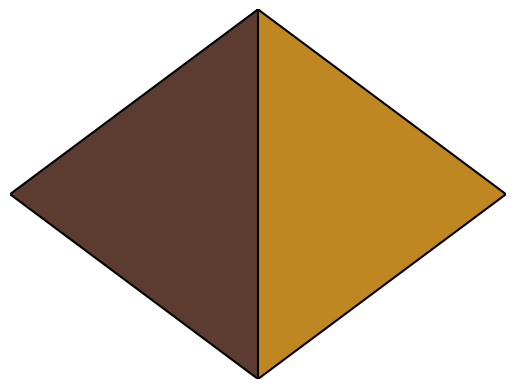

In [10]:
draw_polygon(diamond)